# SOAL UAS

### Soal :

- Download dataset iris.csv di salah satu public dataset : keggle, UCI, dsbnya
- Gunakan Dataset : iris.cvs, pilih satu algoritma yang terbaik berdasarkan evaluasi, simpan menggunakan pickle, siapkan app py, deploy dengan streamlit dan upload ke server stremlit

In [33]:
import pandas as pd
from sklearn import datasets

df_klasifikasi=pd.read_csv("iris.csv")
df_klasifikasi

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
#Feature selection
X=df_klasifikasi[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

#Target
y=df_klasifikasi['Species']
print(X)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

## Normalize Data - Scalling

In [35]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [36]:
print("10 data pertama: ")
print(X[:10])

10 data pertama: 
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


In [37]:
print("10 label pertama: ")
print(y[:10])

10 label pertama: 
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object


# 1. Pembagian Data

## 1.1 Train-Validation Split


Train-Validation split dapat dilakukan dengan menjalankan potongan kode di bawah. Persentase pembagian data training dan data validasi dapat ditentukan dengan mengubah nilai parameter train_size.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [39]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Validation Split:  105
Banyak data uji setelah dilakukan Train-Validation Split:  45


In [40]:
print("Label Training\n",y_train.value_counts())
print("\nLabel Prediksi\n",y_test.value_counts())

Label Training
 Iris-versicolor    37
Iris-setosa        36
Iris-virginica     32
Name: Species, dtype: int64

Label Prediksi
 Iris-virginica     18
Iris-setosa        14
Iris-versicolor    13
Name: Species, dtype: int64


## 1.2	K-Fold Cross Validation

Pustaka Scikit-learn menyediakan wrapper untuk melakukan K-Fold Cross Validation, yaitu dengan meng-import cross_val_score. cross_val_score menerima input berupa model machine learning, data training, label training, dan nilai K. Output yang dikeluarkan akan berupa list berisi akurasi setiap fold, sehingga untuk mendapatkan nilai rata-rata akurasi dari setiap foldnya, dapat menggunakan built-in function mean().

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(model, X, y, cv = 5)
print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 5-Fold Cross Validation: ", scores.mean())

# y_pred = lr.predict(X_test)
# score = metrics.accuracy_score(y_test, y_pred)
# print("Akurasi dengan menggunakan Logistic Regression: ", score)
# from sklearn.metrics import precision_recall_fscore_support
# P=precision_recall_fscore_support(y_test, y_pred, average='macro')
# print("Precison : ",P[0])
# print("Recall : ",P[1])
# print("F Score : ",P[2])

Akurasi model SVM untuk tiap fold:  [0.96666667 1.         0.93333333 0.93333333 1.        ]
Akurasi model SVM dengan 5-Fold Cross Validation:  0.9666666666666668


# 2. Metode Klasifikasi

Untuk potongan-potongan kode Metode Klasifikasi, data yang akan digunakan adalah data yang telah terbagi oleh proses Train-Validation split. Model akan dilatih dengan X_train dan y_train. Model yang telah terlatih kemudian diuji performa akurasinya menggunakan X_test dan y_test.

## 2.1 Logistic Regression

Penjelasan lebih lengkap mengenai penggunaan Logistic Regression dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_lr = score
print("Akurasi dengan menggunakan Logistic Regression: ", score)

Akurasi dengan menggunakan Logistic Regression:  0.9555555555555556


Akurasi Testing NBC: 0.9555555555555556
Akurasi dengan menggunakan Logistic Regression:  0.9555555555555556
Precison :  0.9558404558404558
Recall :  0.9558404558404558
F Score :  0.9558404558404558


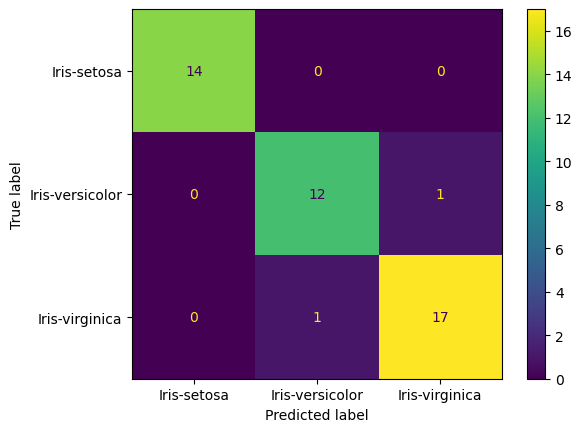

In [43]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

# Ir.fit(X_train, y_train)
# y_pred = Ir.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression: ", score)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.2 Support Vector Machine

Penjelasan lebih lengkap mengenai penggunaan Support Vector Machine dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [44]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01
)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_svm = score
print("Akurasi dengan menggunakan Support Vector Machine: ", score)

Akurasi dengan menggunakan Support Vector Machine:  0.8666666666666667


Akurasi Testing SVM: 0.8666666666666667
Precison :  0.8947368421052632
Recall :  0.8888888888888888
F Score :  0.8708333333333332


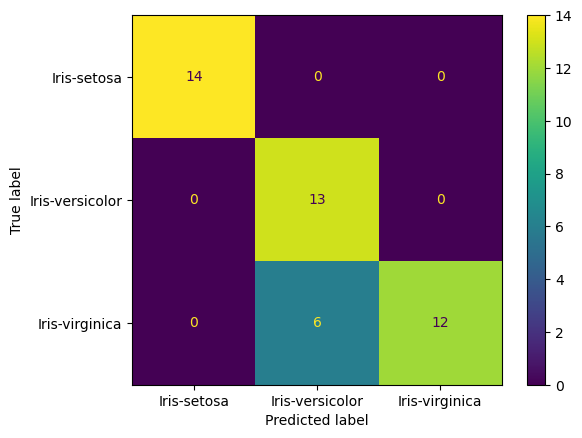

In [45]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing SVM:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

### Hyperparameter SVM

Saat menggunakan model SVM, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara lain kernel (linear, polynomial, rbf), nilai C, dan nilai Gamma.

In [46]:
# SVM dengan kernel Linear, nilai parameter C dapat diubah juga.
svmLinear = SVC(
  kernel = 'linear',
      C = 1)

svmLinear.fit(X_train, y_train)
y_pred = svmLinear.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_svmlk = score
print("Akurasi dengan menggunakan Support Vector Machine Linear Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine Linear Kernel:  0.9777777777777777


Akurasi Testing SVM: 0.9777777777777777
Precison :  0.9761904761904763
Recall :  0.9814814814814815
F Score :  0.9781305114638448


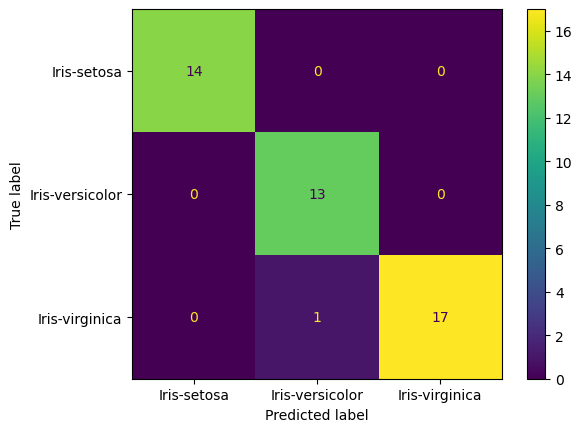

In [47]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svmLinear, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing SVM:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

In [48]:
# SVM dengan kernel polynomial, nilai parameter C, degree, dan gamma dapat diubah juga.
svmPoly = SVC(
  kernel = 'poly',
  C = 1,
  gamma = 0.01,
  degree = 2
)

svmPoly.fit(X_train, y_train)
y_pred = svmPoly.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_svmpk = score
print("Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel:  0.28888888888888886


Akurasi Testing NBC: 0.28888888888888886


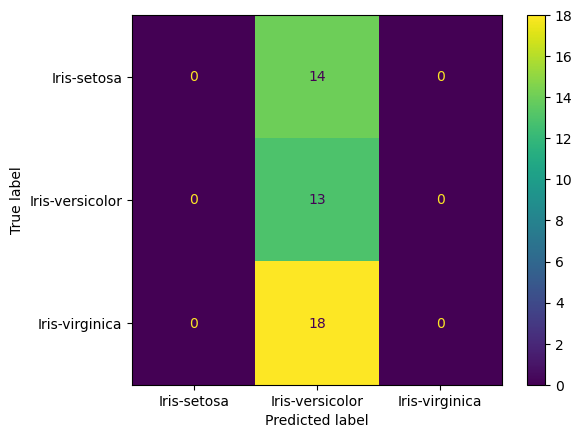

In [49]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svmPoly, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

In [50]:
# SVM dengan kernel RBF, nilai parameter C dan gamma dapat diubah juga.
svmRBF = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01,
)

svmRBF.fit(X_train, y_train)
y_pred = svmRBF.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_svmrbfk = score
print("Akurasi dengan menggunakan Support Vector Machine RBF Kernel: ", score)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

Akurasi dengan menggunakan Support Vector Machine RBF Kernel:  0.8666666666666667
Precison :  0.8947368421052632
Recall :  0.8888888888888888
F Score :  0.8708333333333332


Akurasi Testing NBC: 0.8666666666666667
Precison :  0.8947368421052632
Recall :  0.8888888888888888
F Score :  0.8708333333333332


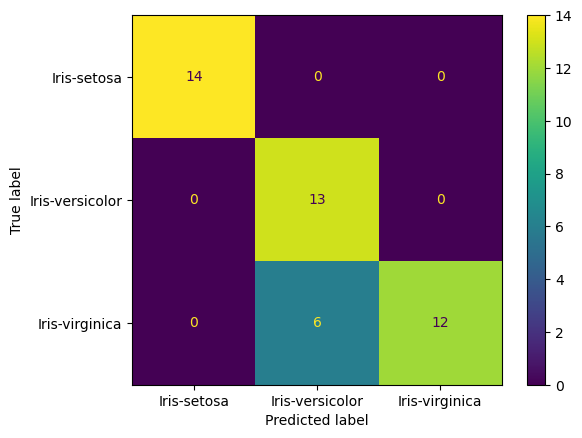

In [51]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svmRBF, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.3 Decision Tree

Penjelasan lebih lengkap mengenai penggunaan Decision Tree dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier(
  max_depth = None,
  min_samples_split = 2
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_dt = score
print("Akurasi dengan menggunakan Decision Tree: ", score)

Akurasi dengan menggunakan Decision Tree:  0.9555555555555556


Akurasi Testing Decision Tree: 0.9555555555555556
Precison :  0.9558404558404558
Recall :  0.9558404558404558
F Score :  0.9558404558404558


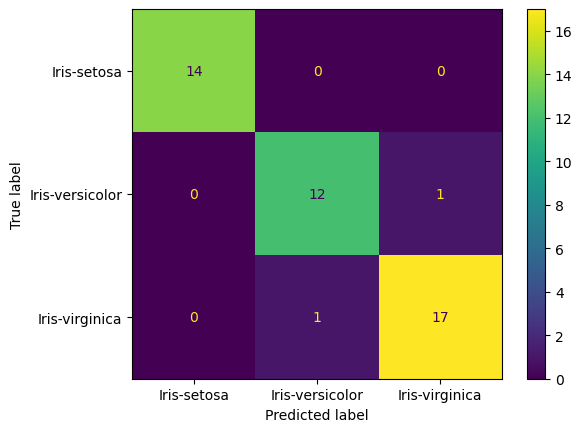

In [53]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing Decision Tree:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

### Hyperparameter Decision Tree

Saat menggunakan model Decision Tree, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara max_depth dan min_samples_split.

In [54]:
# Decision Tree dengan maximal kedalaman adalah max_depth,
# dan minimal jumlah sampel untuk dibentuk leaf baru adalah min_samples_split

dt = DecisionTreeClassifier(
  max_depth = 130,
  min_samples_split = 5
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

Akurasi dengan menggunakan Decision Tree:  0.9777777777777777


Akurasi Testing NBC: 0.9777777777777777
Precison :  0.9824561403508771
Recall :  0.9743589743589745
F Score :  0.9776576576576576


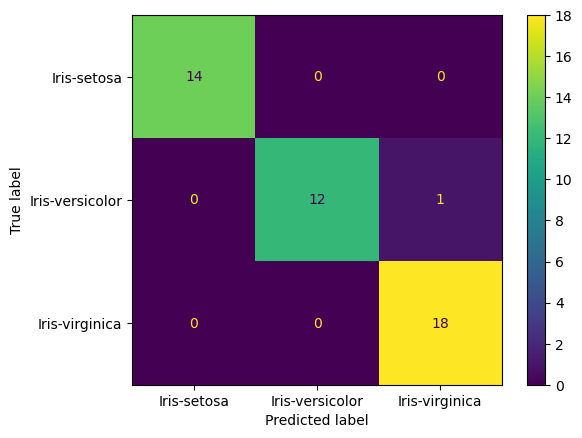

In [55]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.4 Naive Bayes

Penjelasan lebih lengkap mengenai penggunaan Naive Bayes dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

In [56]:
from sklearn import naive_bayes
from sklearn import metrics

nb = naive_bayes.BernoulliNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_nb = score
print("Akurasi dengan menggunakan Naive Bayes: ", score)

Akurasi dengan menggunakan Naive Bayes:  0.8


Akurasi Testing NBC: 0.8
Precison :  0.8035353535353535
Recall :  0.7834757834757835
F Score :  0.7789819376026271


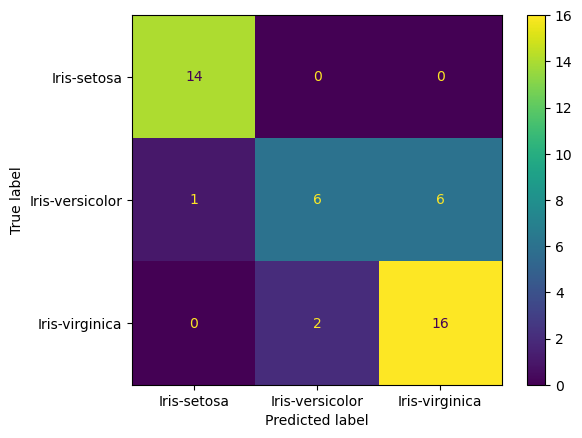

In [57]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(nb, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.5 K-Nearest Neighbors

Penjelasan lebih lengkap mengenai penggunaan K-Nearest Neighbors dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_knn = score
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

Akurasi dengan menggunakan Nearest Neighbor:  0.9333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Akurasi Testing K-NN: 0.9333333333333333
Precison :  0.9327731092436974
Recall :  0.9373219373219372
F Score :  0.9343915343915343


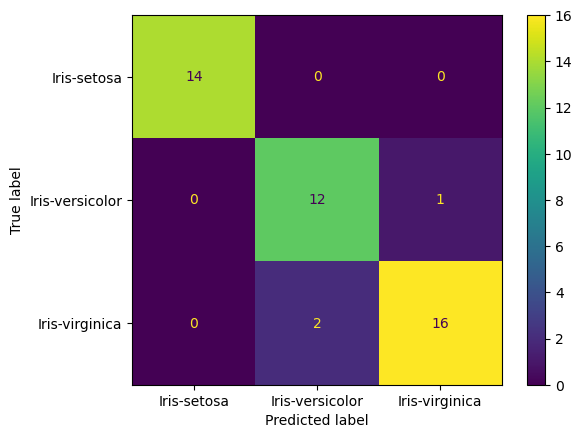

In [59]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix


plot_confusion_matrix(knn, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing K-NN:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.6 AdaBoostClassifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [61]:
ab=AdaBoostClassifier(
n_estimators=600,
learning_rate=1
)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_ab = score
print("Akurasi dengan menggunakan AdaBoostClassifier: ", score)

Akurasi dengan menggunakan AdaBoostClassifier:  0.9333333333333333


Akurasi Testing adaBoost: 0.9333333333333333
Precison :  0.9327731092436974
Recall :  0.9373219373219372
F Score :  0.9343915343915343


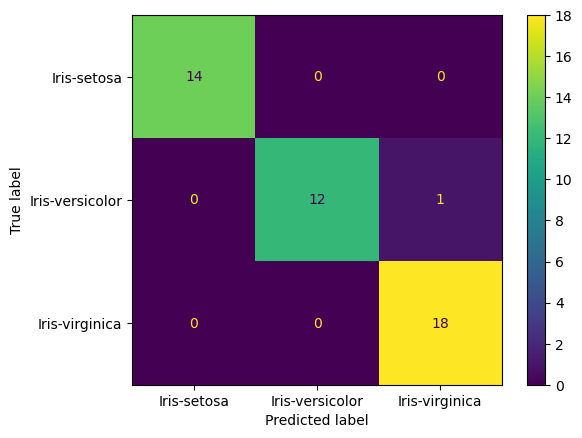

In [62]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing adaBoost:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## Perbandingan Hasil Klasifikasi Data Pendaftar Untuk Berbagai Metoda Klasifikasi :
 

In [63]:
#Lengkapi koding untuk menampilkan di sini semua parameter evaluasi untuk semua model/algoritima klasifikasi di atas
#Tampilkan di sini semua parameter evaluasi untuk semua model klasifikasi
print("Akurasi dengan menggunakan Logistic Regression: ", score_lr)
print("Akurasi dengan menggunakan Support Vector Machine: ", score_svm)
print("Akurasi dengan menggunakan Support Vector Machine Linear Kernel: ", score_svmlk)
print("Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel: ", score_svmpk)
print("Akurasi dengan menggunakan Support Vector Machine RBF Kernel: ", score_svmrbfk)
print("Akurasi dengan menggunakan Decision Tree: ", score_dt)
print("Akurasi dengan menggunakan Naive Bayes: ", score_nb)
print("Akurasi dengan menggunakan K-Nearest Neighbour: ", score_knn)
print("Akurasi dengan menggunakan AdaBoost Classifier: ", score_ab)


Akurasi dengan menggunakan Logistic Regression:  0.9555555555555556
Akurasi dengan menggunakan Support Vector Machine:  0.8666666666666667
Akurasi dengan menggunakan Support Vector Machine Linear Kernel:  0.9777777777777777
Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel:  0.28888888888888886
Akurasi dengan menggunakan Support Vector Machine RBF Kernel:  0.8666666666666667
Akurasi dengan menggunakan Decision Tree:  0.9555555555555556
Akurasi dengan menggunakan Naive Bayes:  0.8
Akurasi dengan menggunakan K-Nearest Neighbour:  0.9333333333333333
Akurasi dengan menggunakan AdaBoost Classifier:  0.9333333333333333


---

## Pilih satu satu Algortima yang hasil trainingnya terbaik menurut anda dan Menyimpan model dengan pickle  Gunakan untuk anda Deploy dalam bentuk aplikasi streamlit dan upload ke streamlit

In [64]:
#Algoritma Naive Bayes

from sklearn import naive_bayes
from sklearn import metrics

nb = naive_bayes.BernoulliNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_nb = score
print("Akurasi dengan menggunakan Naive Bayes: ", score)

Akurasi dengan menggunakan Naive Bayes:  0.8


In [65]:
#import ke pickle
import pickle

pickle.dump(nb,open('model.pkl','wb'))